# Module 2 - Temporal Dynamics in the EEG Engagement Index


## Creators
- Anita Vrins 
- Caterina Ceccato
- Ethel Pruss
- Jos Prinsen


## Dataset

This module makes use of a dataset which reports on participants *EEG Engagement Index* (Pope et al., 1995) during a listening task.

The dataset is divided in two conditions: 
- **Adaptive**: Where a social robot performed a gesture when it noticed a drop in EEG Engagement
- **Random**: Where the same social robot performed a gesture at random times


The index was calculated using Welch's method, with sliding windows of 1 second and no overlap.
The original signal was approximately 5 minutes with a sampling rate of 250 Hz. The EEG Engagement dataset contains approximately 500 timepoints per condition over 2 conditions for 39 participants. 

## Contents:

- **Section 1: What are the temporal signatures of the signal?**
    
- **Section 2: Are the signals stationary?**
   
- **Section 3: Does autocorrelation, as measured by ACF peaks, change over time?** 

## Short summary:
This module focuses on examining the temporal characteristics, stationarity, and autocorrelations of the EEG Engagement Index over time.

To conduct this analysis, the signals were divided into two halves. Variance, mean, and autocorrelation tests were performed on each half of the signals. This methodology draws inspiration from Kantz and Schreiber (2004) (Chapter 2) as a means of testing stationarity. Additionally, KPSS (Kwiatkowski-Phillips-Schmidt-Shin) tests will be employed to assess the stationarity of the time series. 


# Section 1: What are the temporal signatures of the signal?


### 1.1 File loading

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.signal import find_peaks
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



%matplotlib inline

In [4]:

pathRandom = "C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV_1sec\\Random"
pathAdaptive = "C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\EngagementCSV_1sec\\Adaptive"


In [5]:
#Both conditions have 39 participants

flistRandom = []
flistAdaptive = []

for i in os.listdir(pathRandom):
    if 'Engagement_1sec' in i:
        flistRandom.append(i)
        
        
for i in os.listdir(pathAdaptive):
    if 'Engagement_1sec' in i:
        flistAdaptive.append(i)
        
print(len(flistRandom))
print(len(flistAdaptive))


39
39


In [6]:
#Defining a function to easily collect the dataframes for each participant

def getParticipant(num, condition):
    
    if condition == "Adaptive":
        current = pd.read_csv(str(pathAdaptive + '\\' +  flistAdaptive[num-1]))
    elif condition == "Random":
        current = pd.read_csv(str(pathRandom +'\\'+ flistRandom[num-1]))

    else:
        return "Error"
    
    return current


The following dataframe shows the collected EEG Engagement values from 8 different electrodes.
The averages 'Frontal', 'Central' and 'Parietal' are derived from F3, F4, and Fz for frontal, C3, C4 and Cz for central and Pz and Oz for Parietal regions.


In [7]:
p10_adaptive = getParticipant(0, 'Adaptive')
p10_random = getParticipant(0,"Random") 

p10_adaptive.head(5)

,Unnamed: 0,Fz,F3,Cz,F4,Pz,C3,Oz,C4,Frontal,Central,Parietal,Total
0,0,1.960078,2.382929,1.537797,2.625843,1.347760,2.116574,1.603244,2.125283,2.322950,1.926551,1.475502,1.947683
1,1,2.987037,3.217312,2.722943,3.947458,1.658851,1.827398,1.587918,1.273692,3.383935,1.941344,1.623385,2.379207
2,2,1.167410,0.902468,0.551958,0.818416,0.217666,0.314277,0.171922,0.256782,0.962764,0.374339,0.194794,0.539345
3,3,0.730370,1.375985,1.040609,1.089852,0.841796,0.324783,0.616057,0.887992,1.065402,0.751128,0.728926,0.859355
4,4,1.049223,0.353403,0.421533,1.114871,0.123877,0.073599,0.154848,0.332514,0.839166,0.275882,0.139363,0.443480


### 1.2 Visualizing P10 - Adaptive (a random participant)

Text(0, 0.5, 'EEG Engagement Index')

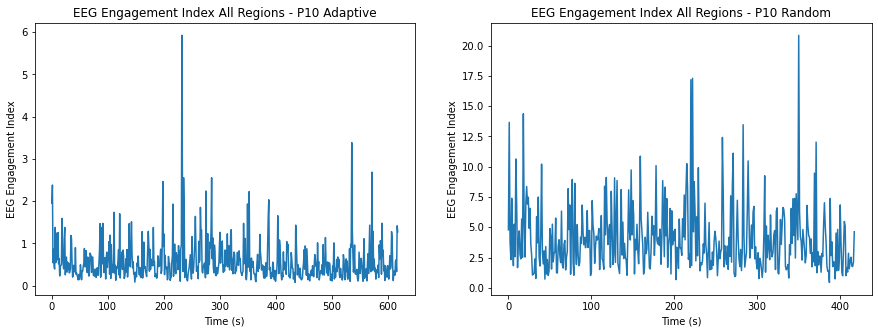

In [8]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.plot(p10_adaptive['Total'])
plt.title('EEG Engagement Index All Regions - P10 Adaptive')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')

plt.subplot(1,2,2)
plt.plot(p10_random['Total'])
plt.title('EEG Engagement Index All Regions - P10 Random')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')


As can be seen in the two plots, the duration of the two conditions was different. 
Additionally, it can be seen that for this participant, the EEG engagement index in the Adaptive condition seemed to fluctuate between 0.5 and 6, which was lower and more narrow than in the Random condition (fluctuation between approx 2 and 20). It is possible that these differences were due to signal noise.

### Q1: The type of change seems to be **deterministic chaos / third order change**. 

# Section 2:  Is the signal stationary?

## Contents: 
- Variance testing
- Mean testing
- Autocorrelation testing
- KPSS Test
- Test for all participants

### 2.1 Stationarity Testing for P10 - Adaptive

#### Dividing the signal into two equal halves

In [9]:
length = len(p10_adaptive)

seq1 = p10_adaptive['Total'][0:length//2]
seq2 = p10_adaptive['Total'][length//2:]
print('Length first half: ', len(seq1))
print('Length second half: ', len(seq2))

Length first half:  309
Length second half:  309


In [10]:
#Testing for normality

from scipy.stats import shapiro
_, p_value1 = shapiro(seq1)
_, p_value2 = shapiro(seq2)



print("p-value seq 1:", p_value1)

print("p-value seq 2:", p_value2)

p-value seq 1: 2.3598737692084928e-23
p-value seq 2: 3.198204334909064e-20


From these t-tests it seems that the data is not normally distributed. We can plot the distribution in histograms as seen below. 

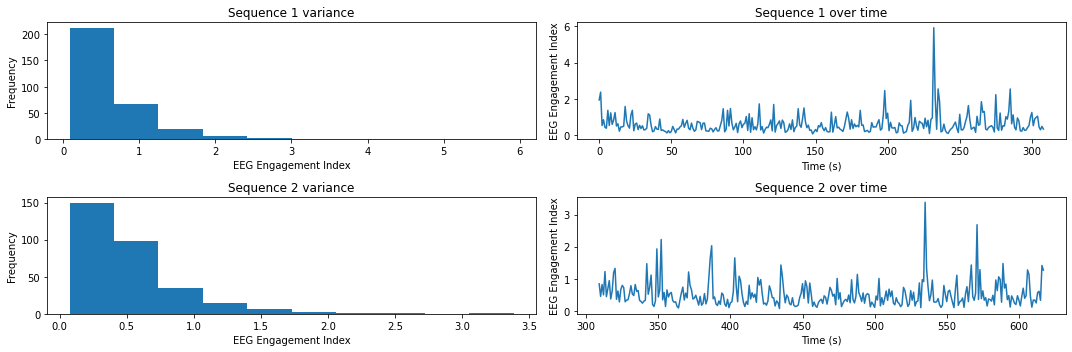

In [11]:
plt.figure(figsize = (15,5))

plt.subplot(2,2,1)
plt.hist(seq1)
plt.title('Sequence 1 variance')
plt.xlabel('EEG Engagement Index')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.plot(seq1)
plt.title('Sequence 1 over time')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')


plt.subplot(2,2,3)
plt.hist(seq2)
plt.title('Sequence 2 variance')
plt.xlabel('EEG Engagement Index')
plt.ylabel('Frequency')


plt.subplot(2,2,4)
plt.plot(seq2)
plt.title('Sequence 2 over time')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')

plt.tight_layout()

It looks like the distribution of the EEG Engagement Index is non-normal and skewed to the left for both halves of the sequence.
For the purpose of approximating normality, we'll log transform the data so we can test it for variance.


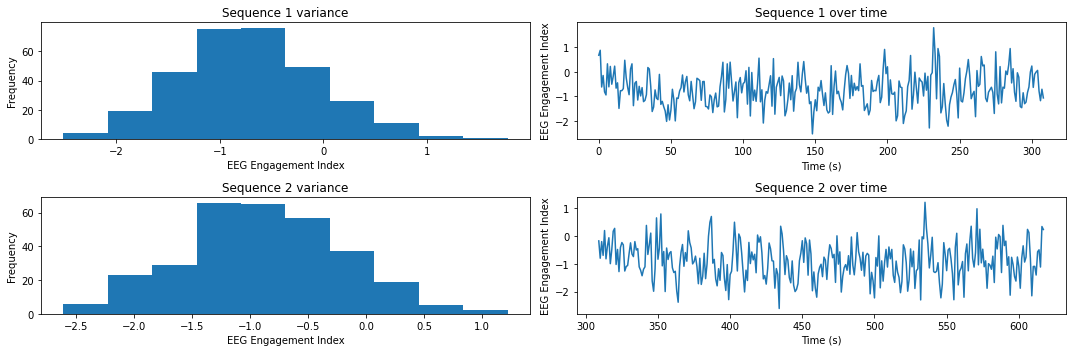

In [23]:
plt.figure(figsize = (15,5))



plt.subplot(2,2,1)
plt.hist(np.log(seq1))
plt.title('Sequence 1 variance')
plt.xlabel('EEG Engagement Index')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.plot(np.log(seq1))
plt.title('Sequence 1 over time')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')


plt.subplot(2,2,3)
plt.hist(np.log(seq2))
plt.title('Sequence 2 variance')
plt.xlabel('EEG Engagement Index')
plt.ylabel('Frequency')


plt.subplot(2,2,4)
plt.plot(np.log(seq2))
plt.title('Sequence 2 over time')
plt.xlabel('Time (s)')
plt.ylabel('EEG Engagement Index')

plt.tight_layout()

#### Variance / Levene Test (P10- Adaptive)


In [87]:
#Variance / Levene test
#Return True if variance is significantly different between the first and second half of the signals

from scipy.stats import levene

def testVariance(p, condition, region):
    participant = getParticipant(p, condition) 
    
    var = False 
    
    length = len(participant[region])
    
    #Log transforming the signal
    logged = np.log(participant[region])

    seq1 = logged[0:length//2] #Dividing the signal into two equal halves
    seq2 = logged[length//2:]
    
    #Levene test 
    stat, p = levene(seq1, seq2)
    
    if p >= 0.05:  
        var = True
          
    elif p <= 0.05:
        var = False
            
    return p, var



In [88]:

print('Variance Adaptive seq1: ', np.std(seq1))
print('Variance Adaptive seq2: ', np.std(seq2))

p, var = testVariance(0, 'Adaptive', 'Total')
print('Levene test p value: ', p,';', 'Is the variance stationary? ', var)

Variance Adaptive seq1:  0.5394209138203775
Variance Adaptive seq2:  0.40539566241440456
Levene test p value:  0.94019675445253 ; Is the variance stationary?  True


From the levene test it seems that the variance between the two halves is not significant (p = 0.9401 )

####  Mean/ T-Test (P10- Adaptive)


In [89]:
#Mean / t-test 

def getMean(p, condition, region ):
    
    var = False
    direction = "No difference"
    
    participant = getParticipant(p, condition)
    length = len(participant[region])
    
    #Log transforming the signal for consistency 
    logged = np.log(participant[region])
    

    seq1 = logged[0:length//2]  #Dividing the signal into two equal halves
    seq2 = logged[length//2:]
    
    pval, var = testVariance(p,condition, region)
    
    #Equal variance = True 
    if var == True:
        stat, pval = stats.ttest_ind(a=seq1, b=seq2, equal_var=True)
              
    #Equal variance = false
    elif var == False:
        stat, pval = stats.ttest_ind(a=seq1, b=seq2, equal_var=False)
        

    if  (np.mean(seq1) > np.mean(seq2)):
        direction = "Downward"
        
    elif (np.mean(seq1) < np.mean(seq2)):
        direction = "Upward"
        
    return pval,  direction #output includes a direction of change for the mean


In [90]:


print('Mean Adaptive seq1: ', np.mean(seq1))
print('Mean Adaptive seq2: ', np.mean(seq2))

pval,  direction = getMean(0, 'Adaptive', 'Total')

print( 'T-test p_value: ', p,';' ,'Direction of change: ', direction)

Mean Adaptive seq1:  0.6252999662745523
Mean Adaptive seq2:  0.5216949769369922
T-test p_value:  0.94019675445253 ; Direction of change:  Downward


From this result, it seems that the mean EEG Engagement Index does not significantly change between the two halves of the signal. 

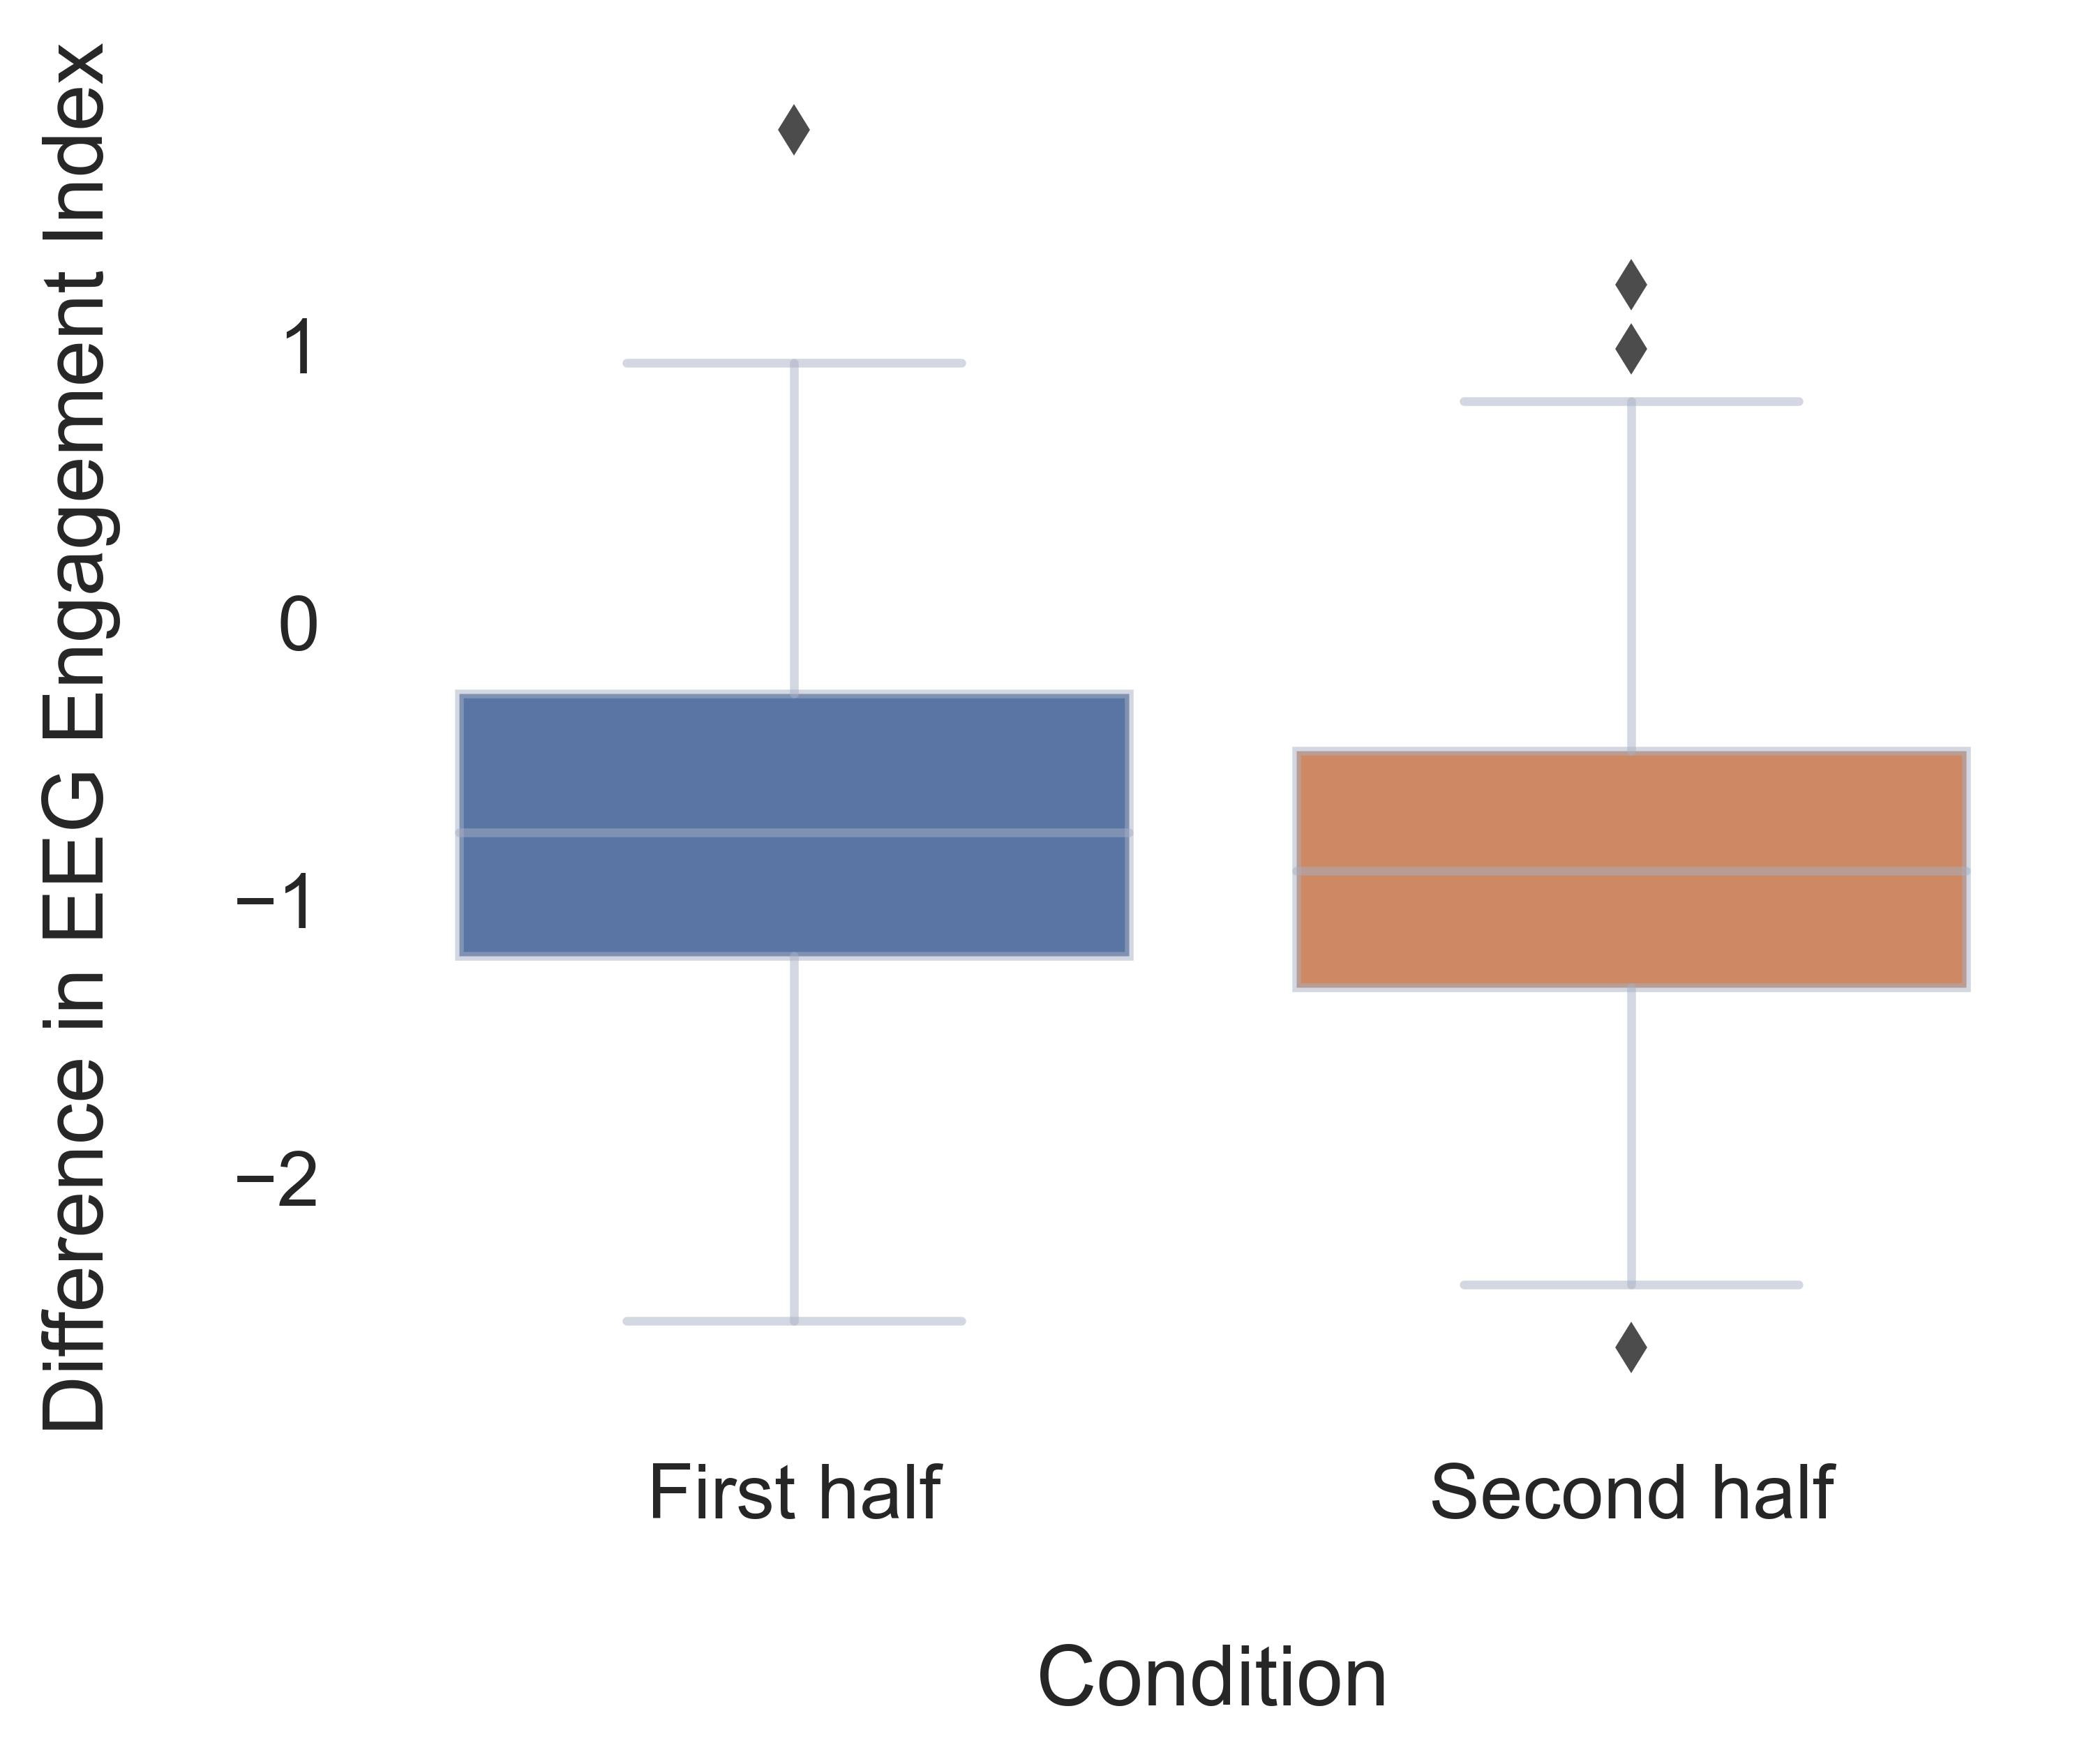

In [91]:
#This plot shows the difference of the EEG Engagement index over the first and second half of P10 - Adaptive

import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="white", font_scale=1.2)

data = [np.log(seq1), np.log(seq2)]
labels = ['First half', 'Second half']

bcolor = '#A8B0C480'

plt.figure(dpi=600, figsize=(5, 4))

ax = sns.boxplot(data=data, boxprops=dict(edgecolor=bcolor),
            medianprops=dict(color=bcolor), whiskerprops=dict(color=bcolor), capprops=dict(color=bcolor))
ax.set_xticklabels(labels)


ax.set_xlabel('\nCondition')
ax.set_ylabel('Difference in EEG Engagement Index\n')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

####  Checking autocorrelation (P10 - Adaptive)

Just as we did before with the variance and mean testing, the signal is divided into two halves. 

ACF and PACF plots were used to visualize autocorrelations in the two halves of the signal.

Maxlag =  153.5


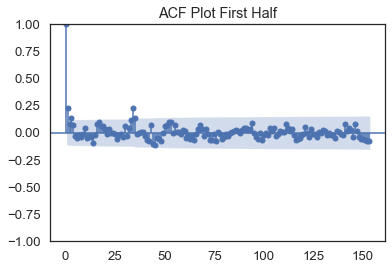

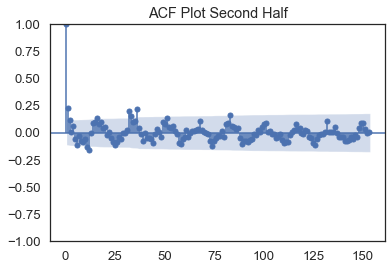

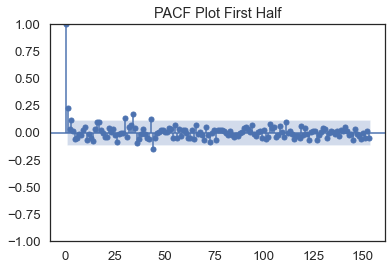

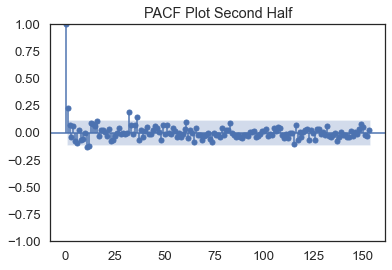

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa


maxlag = len(seq1)/2 -1 #The max lag is set at 1/2 of the half signal length
                        #The -1 is to prevent the error which says the maximum lags can't be more than 50% of the original signal
    
print('Maxlag = ', maxlag)

plot_acf(seq1, lags=maxlag);
plt.title('ACF Plot First Half')
plt.show()


plot_acf(seq2, lags=maxlag);
plt.title('ACF Plot Second Half')
plt.show()


plot_pacf(seq1, lags=maxlag, method='ywm')
plt.title('PACF Plot First Half')
plt.show()


plot_pacf(seq2, lags=maxlag, method='ywm')
plt.title('PACF Plot Second Half')
plt.show()




Interestingly, there seems to be a sinusoid patten in the ACF plot of the second half of P10- Adaptive. 
We can perform a fourier transform to see if there are any dominant frequencies we can extract. 

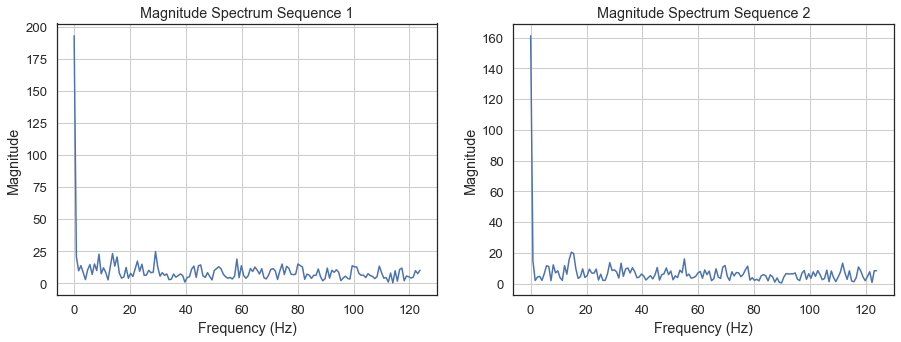

In [108]:
srate = 250
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)

X = np.fft.fft(seq1)   #Using the fourier transform to obtain the spectral features
magnitudes = np.abs(X) #Getting the absolute values to display the dominant frequencies in a magnitude plot
frequencies = np.fft.fftfreq(len(seq1), d=1/srate) 
plt.plot(frequencies[:len(frequencies)//2], magnitudes[:len(magnitudes)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum Sequence 1')
plt.grid(True)

plt.subplot(1,2,2)

X = np.fft.fft(seq2) #Same procedure for the second half of the sequence
magnitudes = np.abs(X)
frequencies = np.fft.fftfreq(len(seq2), d=1/srate)
plt.plot(frequencies[:len(frequencies)//2], magnitudes[:len(magnitudes)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum Sequence 2')
plt.grid(True)


From the magnitude plots it seems that the **most periodicity can be found at very small lag values around 1**.  

Unfortunately, it is hard to explain the sinusoidal pattern/periodicity from the second ACF plot using this method alone. 

Another way to try and find periodicity is by getting any significant peaks from ACF which we will do next. 

In [17]:
#The following code calculates whether there are any significant peaks in the ACF
#We divide the signal into two halves once more to see if anything is different between the detected peaks

from statsmodels.tsa import stattools
def getPeaks(p, condition, region):
    
    
    participant = getParticipant(p, condition) 
    length = len(participant[region])

    seq1 = participant[region][0:length//2]
    seq2 = participant[region][length//2:]
    
    peaklist1 = []  
    peaklist2 = []  
    
    autocorr_1 = tsa.acf(seq1, nlags = length//2)   #capping the lags at 1/4th of the full condition
    autocorr_2 = tsa.acf(seq2, nlags = length//2) 
    
    acf_significant_1 = (np.abs(autocorr_1[1:]) > (1.96 / np.sqrt(len(seq1)))) #Significance set at 0.05
    acf_lags_1 = np.where(acf_significant_1)[0] + 1
    
    acf_significant_2 = (np.abs(autocorr_2[1:]) > (1.96 / np.sqrt(len(seq2))))
    acf_lags_2 = np.where(acf_significant_2)[0] + 1
    
    peaklist1.append(acf_lags_1) 
    peaklist1 = np.array(peaklist1)
    
    peaklist2.append(acf_lags_2) 
    peaklist2 = np.array(peaklist2)
    
    return peaklist1.flatten(), peaklist2.flatten()

s1, s2 = getPeaks(0,'Adaptive', 'Total')

print('Significant lag peaks - First Half: ', s1 )
print('Significant lag peaks - Second Half: ', s2)

print('Significant lag - P10 Adaptive Overall: ', np.concatenate((s1, s2), axis=0))


Significant lag peaks - First Half:  [ 1  3 33 34 35 45]
Significant lag peaks - Second Half:  [  1   2  11  12  16  25  32  33  36  51  74  83 126 174 186]
Significant lag - P10 Adaptive Overall:  [  1   3  33  34  35  45   1   2  11  12  16  25  32  33  36  51  74  83
 126 174 186]


The **significant lag peaks seem to occur mostly at 1-3 lags for both halves of the signal. This aligns with the magnitude plots we made before, which show large peaks at around 1-3 Hz as well.** 
However, in the second half, it seems that there are some more significant peaks at higher lag values.
We can visualize this in some histograms.

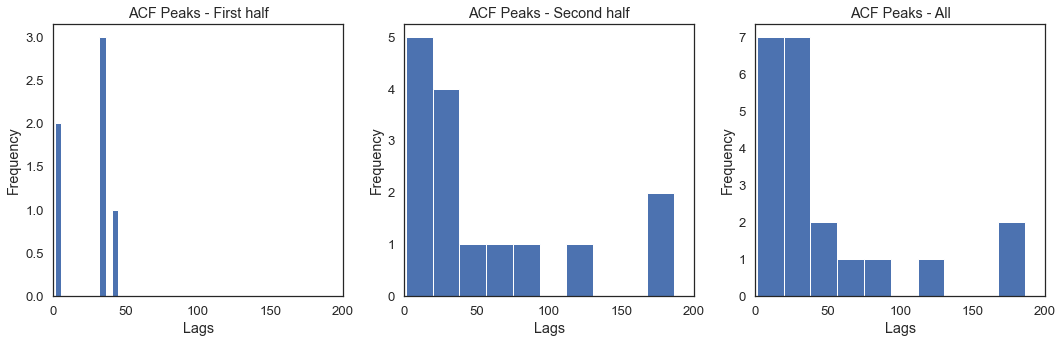

In [18]:
plt.figure( figsize = (15, 5))

plt.subplot(1,3,1)
plt.hist(s1)
plt.title('ACF Peaks - First half')
plt.xlabel('Lags')
plt.ylabel('Frequency')
plt.xlim(0,200)

plt.subplot(1,3,2)
plt.hist(s2)
plt.title('ACF Peaks - Second half')
plt.xlabel('Lags')
plt.ylabel('Frequency')
plt.xlim(0,200)

plt.subplot(1,3,3)
plt.hist(np.concatenate((s1, s2), axis=0))
plt.title('ACF Peaks - All')
plt.xlabel('Lags')
plt.ylabel('Frequency')
plt.xlim(0,200)

plt.tight_layout()

- The significant ACF peaks seem to be **different in the second half compared to the first half**.
- Specifically, it looks like the **significant lag peaks take higher values in the second half of the signal**. 
- This indicates that, at least for participant 10,  the temporal dynamics of the EEG Engagement Index changed over time in the adaptive condition.  

#### KPSS Test (P10 - Adaptive)

As an overall test for stationarity, the KPSS test statistic will be calculated here for participant 10 (Adaptive Condition).

It returns True if the signal is stationary, (determined by the p-value being smaller than 0.05). 

In [19]:

from statsmodels.tsa.stattools import kpss


def testStationarity(p, condition, region):
    participant = getParticipant(p, condition)
    
    stat, p_value, _, _ = kpss(participant[region])
    
    if p_value <= 0.05:   #Return true if the p value is significant
        var = False
    else:
        var = True
            
    return p_value, stat, var


p, stat, var = testStationarity(0, 'Adaptive', 'Total')
print("p-value:", p)

print("KPSS Statistic:", stat)
print("Stationary:", var)


p-value: 0.09268447165159516
KPSS Statistic: 0.36397202576829923
Stationary: True


This signal (P10- Adaptive) seems to be stationary due to the **non-significant outcome of the KPSS test**. (p = 0.0926) 

### 2.2 Stationarity Testing Random Condition

In this section, we will calculate stationarity of the following variables for all signals in both conditions. 

Essentially, this will be done in the same way as outlined above with P10 - Adaptive. 
- Check variance
- Check mean
- Get significant autocorrelation peaks
- Check KPSS statistic


In [109]:
#This code block generates the dataframes containing relevant information about stationarity and ACF peaks in both conditions

import warnings
warnings.filterwarnings("ignore")

conditions = ['Random', 'Adaptive']
regions = ['Total', 'Frontal', 'Central', 'Parietal']
random_dfs = []
adaptive_dfs = []

def getDF(condition, region):
    stats = []
    pvals = []
    bools = []
    direction = []
    variances_p = []
    means_p = []
    autocorrs1 = []
    autocorrs2 = []
    
    for i in range(len(flistRandom)):
        
        #Appending variance stationarity test between to halves of each signal
        p, stat, var = testStationarity(i, condition, region)
        stats.append(stat)
        pvals.append(p)
        bools.append(var)
        
        var_p, var_bool = testVariance(i, condition, region)
        
        variances_p.append(var_p)
        
        #Appending t test results by comparing means of the two halves of each signal
        mean_p,  direct = getMean(i, condition, region)
        means_p.append(mean_p)
        direction.append(direct)

        #Appending significant ACF peaks of both halves of each signal
        a1, a2 = getPeaks(i, condition, region)
        autocorrs1.append(a1)
        autocorrs2.append(a2)
          
    
    df_out = pd.DataFrame({
        'Participant': flistRandom,
        'Levene_p': variances_p,
        'Ttest_p': means_p,
        'KPSS Value': stats,
        'KPSS_p': pvals,
        'KPSS_Stationary' : bools, 
        'MeanDirection': direction,
        'ACF_FirstHalf' : autocorrs1, 
        'ACF_SecondHalf' : autocorrs2
    })
    
    return df_out


#Creating two lists of dataframes for each region (Total, Frontal, Central and Parietal)
# in each condition (Adaptive and Random)

for condition in conditions:
    for region in regions: 
        if condition == 'Random':
            random_dfs.append(getDF(condition, region))
            
        elif condition == 'Adaptive':
            adaptive_dfs.append(getDF(condition, region))



In [59]:
random_dfs[0].head(5) #Statistics for Random condition, Total Region

,Participant,Levene_p,Ttest_p,KPSS Value,KPSS_p,KPSS_Stationary,MeanDirection,ACF_FirstHalf,ACF_SecondHalf
0,P10Engagement_1sec.csv,0.218276,0.126191,0.264644,0.10,True,Downward,"[7, 17, 71]","[2, 7, 16, 130]"
1,P11Engagement_1sec.csv,0.601199,0.466379,0.115132,0.10,True,Upward,"[1, 52, 74, 91]","[2, 5, 40, 51, 70, 116]"
2,P12Engagement_1sec.csv,0.660891,0.594301,0.088620,0.10,True,Upward,[6],"[10, 28, 71, 82]"
3,P13Engagement_1sec.csv,0.632498,0.207317,0.081047,0.10,True,Downward,"[2, 14, 16, 31, 34, 43, 45]","[9, 47, 50, 69]"
4,P14Engagement_1sec.csv,0.717288,0.000329,0.851761,0.01,False,Upward,"[18, 24, 31, 38, 69, 149]","[2, 26, 48, 98]"


In [110]:
vartests = random_dfs[0].loc[random_dfs[0]['Levene_p'] < 0.05] #Finding where the variance of the two halves was significantly different

print('Variance test results: ')
print('{}/39 times, the variance of the signal was equal in both halves of the signal.'.format(39-len(directions)))

print('\n')

ttests = random_dfs[0].loc[random_dfs[0]['Ttest_p'] < 0.05] #Finding where the mean of the two halves was significantly different

print('T-test results: ')
print('{}/39 times, the mean of the signal was equal in both halves of the signal.'.format(39-len(directions)))
print('{}/39 times, the mean of the signal was greater in the second half.'.format(np.count_nonzero(np.equal(ttests, 'Upward'))))
print('{}/39 times, the mean of the signal was less in the second half.'.format(np.count_nonzero(np.equal(ttests, 'Downward'))))

print('\n')

print('KPSS test results: ')
print("{}/39 timeseries in the Total region were stationary!".format(sum(random_dfs[0]['KPSS_Stationary']), condition ))
print("{}/39 timeseries in the Frontal region were stationary!".format(sum(random_dfs[1]['KPSS_Stationary']), condition ))
print("{}/39 timeseries in the Central region were stationary!".format(sum(random_dfs[2]['KPSS_Stationary']), condition ))
print("{}/39 timeseries in the Parietal region were stationary!".format(sum(random_dfs[3]['KPSS_Stationary']), condition ))






Variance test results: 
27/39 times, the variance of the signal was equal in both halves of the signal.


T-test results: 
27/39 times, the mean of the signal was equal in both halves of the signal.
4/39 times, the mean of the signal was greater in the second half.
8/39 times, the mean of the signal was less in the second half.


KPSS test results: 
28/39 timeseries in the Total region were stationary!
29/39 timeseries in the Frontal region were stationary!
27/39 timeseries in the Central region were stationary!
29/39 timeseries in the Parietal region were stationary!


### Q2: Are the signals stationary? (Random Condition)

- The **variance** between first and second halves **tended to remain the same** (27/39 times)


- The **mean** of the EEG Engagement index **tended to remain the same in both halves of the timeseries**. However, when it did change, it usually ended up significantly lower (8/12 times), rather than higher (4/12 times). 


- It seems that during the random condition, the **EEG engagement index was not always stationary according to KPSS test results**. A breakdown per region shows that there is no big difference between regions. However nonstationarity was most common in the central region by a small margin. 





### 2.3 Stationarity Testing Adaptive Condition

In [111]:
vartests = adaptive_dfs[0].loc[adaptive_dfs[0]['Levene_p'] < 0.05] #Finding where the variance of the two halves was significantly different

print('Variance test results: ')
print('{}/39 times, the variance of the signal was equal in both halves of the signal.'.format(39-len(directions)))

print('\n')

ttests = adaptive_dfs[0].loc[adaptive_dfs[0]['Ttest_p'] < 0.05] #Finding where the mean of the two halves was significantly different

print('T-test results: ')
print('{}/39 times, the mean of the signal was equal in both halves of the signal.'.format(39-len(directions)))
print('{}/39 times, the mean of the signal was greater in the second half.'.format(np.count_nonzero(np.equal(ttests, 'Upward'))))
print('{}/39 times, the mean of the signal was less in the second half.'.format(np.count_nonzero(np.equal(ttests, 'Downward'))))

print('\n')

print('KPSS test results: ')
print("{}/39 timeseries in the Total region were stationary!".format(sum(adaptive_dfs[0]['KPSS_Stationary']), condition ))
print("{}/39 timeseries in the Frontal region were stationary!".format(sum(adaptive_dfs[1]['KPSS_Stationary']), condition ))
print("{}/39 timeseries in the Central region were stationary!".format(sum(adaptive_dfs[2]['KPSS_Stationary']), condition ))
print("{}/39 timeseries in the Parietal region were stationary!".format(sum(adaptive_dfs[3]['KPSS_Stationary']), condition ))





Variance test results: 
27/39 times, the variance of the signal was equal in both halves of the signal.


T-test results: 
27/39 times, the mean of the signal was equal in both halves of the signal.
4/39 times, the mean of the signal was greater in the second half.
9/39 times, the mean of the signal was less in the second half.


KPSS test results: 
25/39 timeseries in the Total region were stationary!
25/39 timeseries in the Frontal region were stationary!
26/39 timeseries in the Central region were stationary!
29/39 timeseries in the Parietal region were stationary!


### Q2: Are the signals stationary? (Adaptive Condition)

- The **variance** between first and second halves **tended to remain the same** (27/39 times)


- The **mean** of the EEG Engagement index **tended to remain the same in both halves of the timeseries** (27/39 times). However, when it did change, it usually ended up significantly lower (9/13 times), rather than higher (4/13 times). 


- It seems that during the random condition, the **EEG engagement index was not always stationary according to KPSS test results**. A breakdown per region shows that the signal in the Parietal region mostly remains stationary (29/39). However nonstationarity was most common when all regions were combined (14/39) and in the frontal region (14/39). 



# Section 3: Do Autocorrelation peaks change over time?

In Section 2, we observed that in the Adaptive condition, for participant P10, the autocorrelation plot of the EEG Engagement Index exhibited a more sinusoidal pattern in the second half of the signal. Additionally, we discovered that the distribution of significant ACF peaks differed between the first and second halves of the signal.

To further investigate whether this finding was a mere coincidence or a potential trend among participants, this section presents an analysis of the distribution of ACF peaks for the EEG Engagement Index in both conditions. Specifically, we examine how these peaks are distributed between the first and second halves of the signals for each participant in both the Adaptive and Control conditions.


## 3.1 Random condition

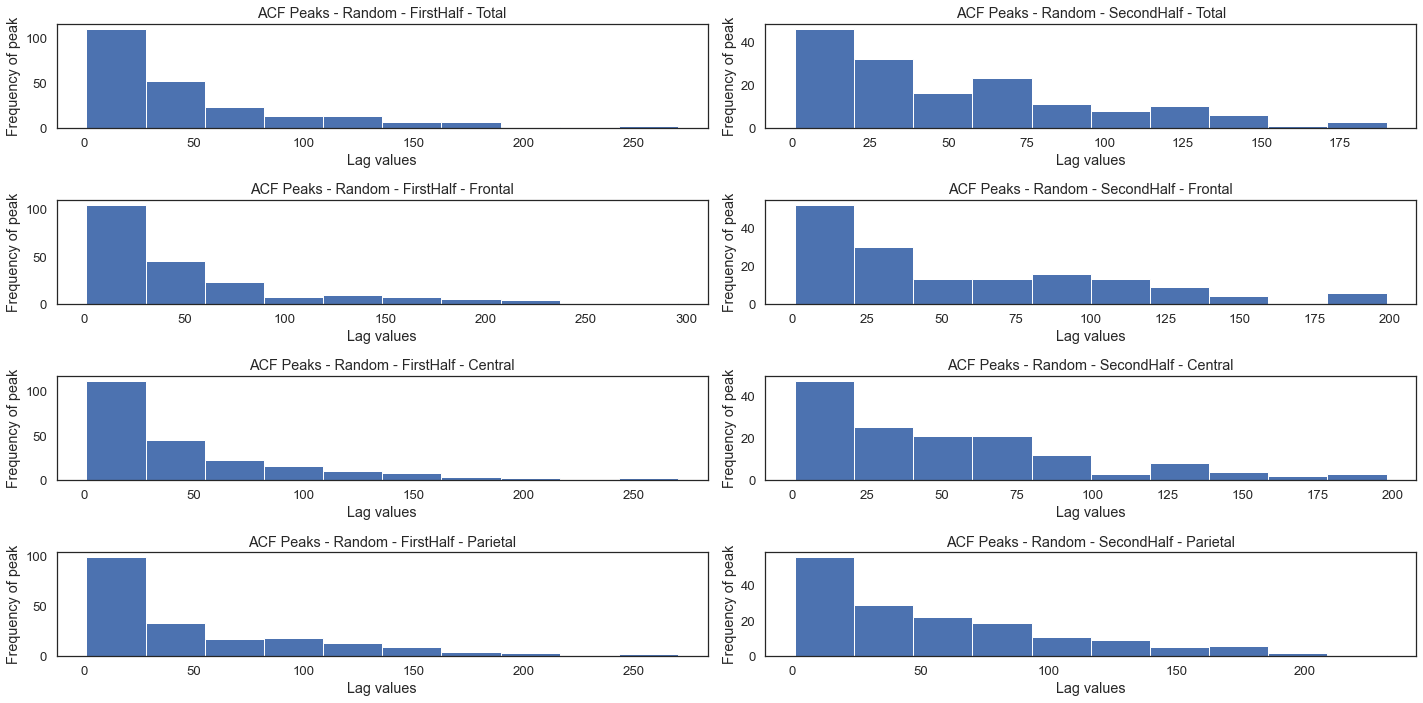

In [114]:
import matplotlib.pyplot as plt

regions = ['Total', 'Frontal', 'Central', 'Parietal']
titles = ['FirstHalf', 'SecondHalf']

plt.figure(figsize=(20, 10))


for i, region in enumerate(regions):
    row_data = []
    for j, title in enumerate(titles):
        subplot_num = i * len(titles) + j + 1
        plt.subplot(4, 2, subplot_num)
        
        sample = random_dfs[i]['ACF_{}'.format(title)]
        sample_flat = np.concatenate(sample).flatten()
        
        plt.hist(sample_flat)
        plt.title('ACF Peaks - Random - {} - {}'.format(title, region))
        plt.xlabel('Lag values')
        plt.ylabel('Frequency of peak')

plt.tight_layout()
plt.show()


### Q3: Does autocorrelation as calculated by ACF change over time? (Random Condition)

These histograms show the distribution of significant ACF lag peaks between the first and second halves of the timeseries.  

It looks like in every region, the ACF peaks of the EEG Engagement Index become more evenly distributed towards the second half of the signal. From the histrograms, it may be interpreted that the temporal dynamics of the EEG Engagement Index change over time. In particular, it looks like the intervals of periodicity in this index became larger towards the second half of the signal.  

Since the EEG Engagement Index is found to be correlated with levels of attention and workload (Pope et al. 1995), it is possible that this change signals a transition in these cognitive states. 

## 3.2 Adaptive condition

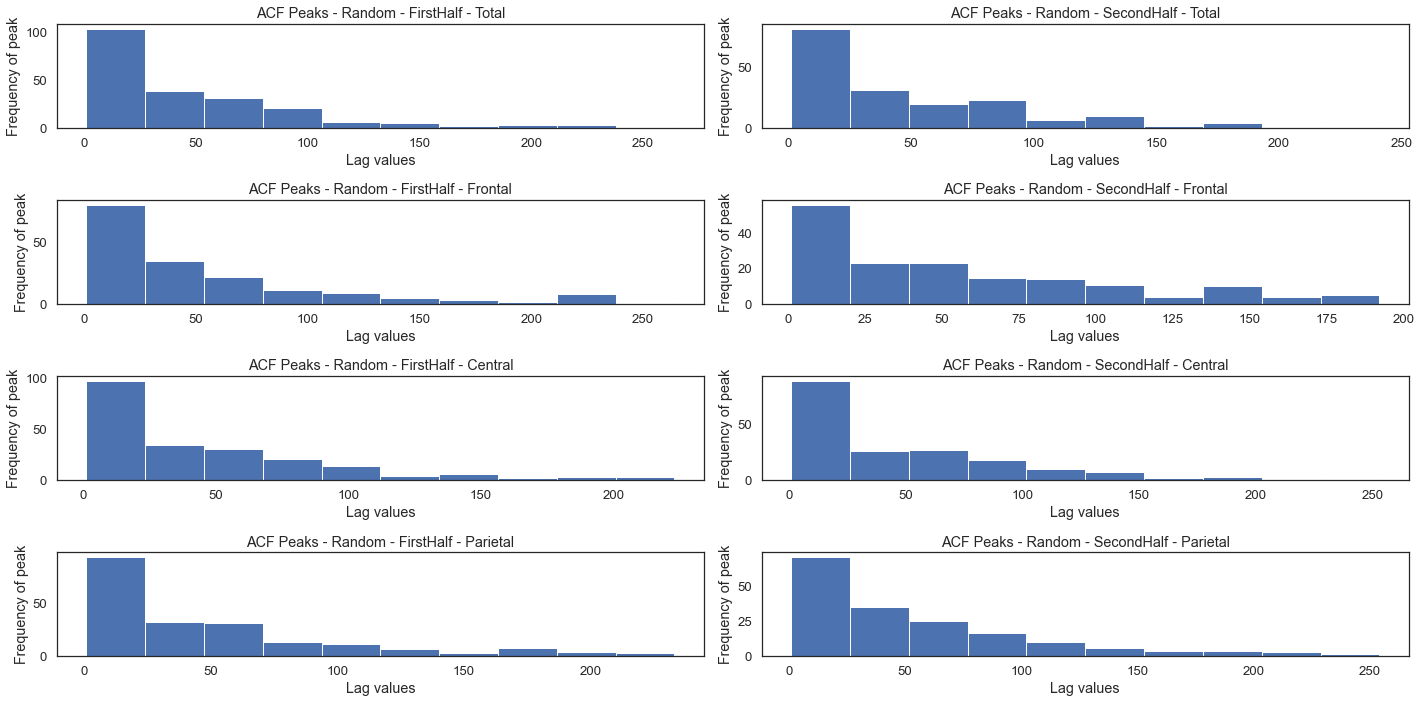

In [57]:
import matplotlib.pyplot as plt

regions = ['Total', 'Frontal', 'Central', 'Parietal']
titles = ['FirstHalf', 'SecondHalf']

plt.figure(figsize=(20, 10))

for i, region in enumerate(regions):
    for j, title in enumerate(titles):
        subplot_num = i * len(titles) + j + 1
        plt.subplot(4, 2, subplot_num)
        
        sample = adaptive_dfs[i]['ACF_{}'.format(title)]
        sample_flat = np.concatenate(sample).flatten()
        
        plt.hist(sample_flat)
        plt.title('ACF Peaks - Random - {} - {}'.format(title, region))
        plt.xlabel('Lag values')
        plt.ylabel('Frequency of peak')

plt.tight_layout()
plt.show()



### Q3: Does autocorrelation as calculated by ACF change over time? (Adaptive Condition)
Similarly to the random condition, it looks like the ACF peak histograms become more evenly distributed in the second half of the signals. 




## Summary and Conclusion 

### Section 1
The EEG Engagement Index seems to have a temporal signature of third order change. Perhaps this is not surprising as the index is composed of EEG signals which tend to be quite volatile. 

### Section 2

The variance of the EEG Engagement Index tended to remain stationary over time. 

Similarly, the mean of the index tended to remain the same. However, when it did significantly change, the trend was downward rather than upward. This finding was consistent over both conditions. 

As for the KPSS test, it showed that the EEG Engagement Index was not always stationary.
Upon investigating stationarity on a topological level, only small differences were observed. 
In the random condition, most nonstationarity was observed in the Central region. In the Adaptive condition, most nonstationarity was found in the frontal region and in the average of all regions. 

### Section 3

Finally, we found that autocorrelation peaks were distributed differently between the first and second halves of the same condition. In particular, the distribution became more normal in the second half of the signal. This was a consistent finding for both conditions and in all topological regions of interest and it may indicate a transition in cognitive state as the participants experienced the listening task. 

This finding is also consistent with our results from modules 6 and 7, which show similar changes in the phase portraits of the EEG signals as well as in the recurrence plots of different epochs of the signals. 

# References
Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357â€“362 (2020). DOI: 10.1038/s41586-020-2649-2.

Hunter, J. D., "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

Kantz, Holger & Schreiber, Thomas. (2003). Nonlinear Time Series Analysis. 10.1017/CBO9780511755798. 

McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51â€“56).

Pope, A. T., Bogart, E. H., & Bartolome, D. S. (1995). Biocybernetic system evaluates indices of operator engagement in automated task. Biological Psychology, 40(1â€“2), 187â€“195. https://doi.org/10.1016/0301-0511(95)05116-3.

Seabold, S., & Perktold, J. (2010). statsmodels: Econometric and statistical modeling with python. In 9th Python in Science Conference.

Waskom, M., Botvinnik, Olga, Kane,Drew, Hobson,Paul, Lukauskas,Saulius, Gemperline,David C, â€¦ Qalieh, Adel.(2017). mwaskom/seaborn: v0.8.1 (September 2017). Zenodo. https://doi.org/10.5281/zenodo.883859.

Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., â€¦ SciPy 1.0 Contributors. (2020). SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17, 261â€“272. https://doi.org/10.1038/s41592-019-0686-2.
